In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

파일 열기

In [21]:
df=pd.read_csv("../data00/Heart_Disease_Prediction.csv")
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [22]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

컬럼 이름 바꾸기

전체 이름 바꾸기 df=df.columns=[ , ,]
일부 이름 바꾸기 df=df.rename(columns={})

In [23]:
df = df.rename(columns={
    'Chest pain type': 'cp',
    'BP': 'trestbps',
    'Cholesterol': 'chol',
    'FBS over 120': 'fbs',
    'EKG results': 'restecg',
    'Max HR': 'thalach',
    'Exercise angina': 'exang',
    'ST depression': 'oldpeak',
    'Slope of ST': 'slope',
    'Number of vessels fluro': 'ca',
    'Thallium': 'thal',
    'Heart Disease': 'target'
})

In [24]:
df.head(5)

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


컬럼 역할 미리 분리(설계도 만들기)

In [27]:
cat_cols = ['Sex','cp','fbs','restecg','exang','slope','ca','thal']
num_cols = ['Age','trestbps','chol','thalach','oldpeak']
target_col = 'target'

In [28]:
cat_cols
num_cols

['Age', 'trestbps', 'chol', 'thalach', 'oldpeak']

EDA(Exploratory Data Analysis)
데이터 기본 상태 점검, 수치형 변수 분포 보기, 범주형 변수 분포 보기, 타켓(심장질환) 기준으로 비교

데이터 기본 상태 점검
 1. 데이터는 몇 행 몇 열인가
 2. 결측치(빈칸)는 있어?
 3. target(질병 있음/없음) 비율은 어때? -> 불균형 데이터인지 확인 필요!!!!!!!

수치형 변수 분포 보기
 1. 값이 튀는지 확인
 2. 값이 대략 어느 범위, 분포가 한쪽으로 쏠린건 아닌지 확인.

범주형 변수 분포 보기
 1. 특정 범주가 너무 많거나 적지 않은지 확인
 2. 성별 편향 확인
 3. cp에서 특정 흉통 타입만 차지 하고 있지 않은지

타켓 기준 비교
 심장질환 있는 사람은 뭐가 다를까?
 1. 수치형 변수 vs target(boxplot) 
  oldpeak가 질병이 있는 그룹이 더 높다. 
  thalach(최대 심박수)기 질병 없는 그룹에서 더 높다 -> 변수는 질병과 연관있다.
 2. 범주형 변수 vs target(비율비교)
  exang = 1인 사람 중 질병 비율이 높다.
  cp = 특정 흉통 타입에서 질병이 많다.
=> 가설의 근거를 마련

EDA의 최종 목적
 1. 의미 있어 보이는 변수 찾기
 2. 의료적으로 설명 가능한 패턴 발견
 3. '왜 이 변수를 쓰는지' 설득력 부여

EDA 0 - 준비 상태 확인

In [12]:
cat_cols
num_cols
target_col

'target'

1. 수치형 vs target(boxplot + 평균 비교)
 - 심장 질환이 있는 사람과 없는 사람은 이 숫자 변수에서 차이가 날까?

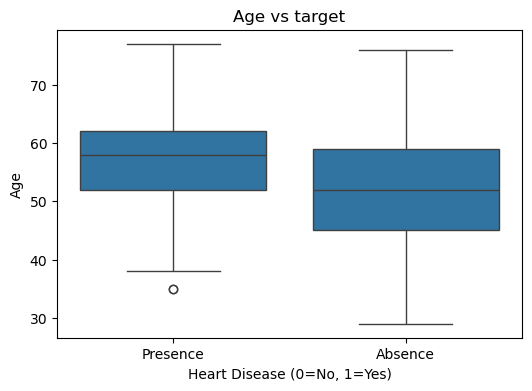

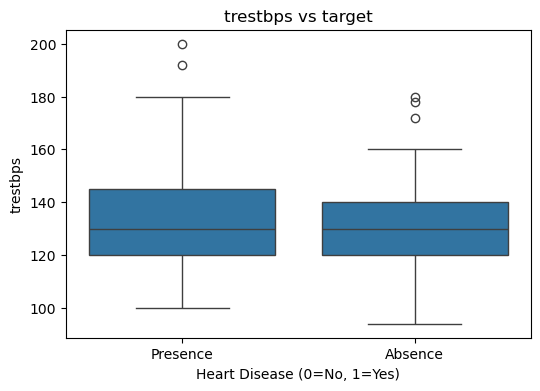

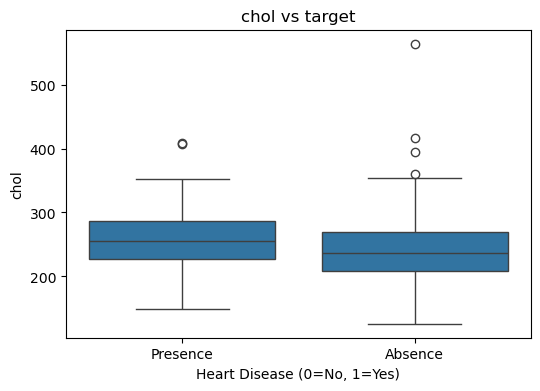

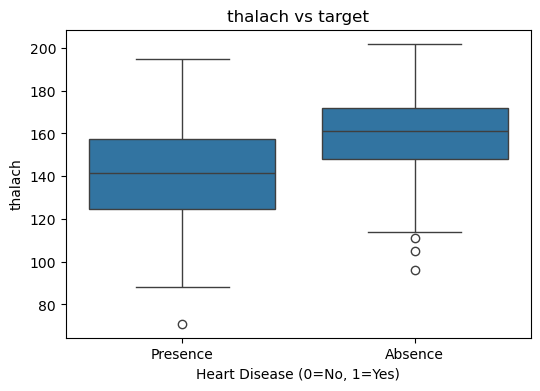

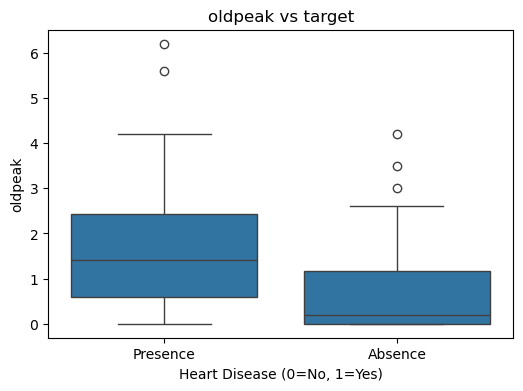

In [29]:
for col in num_cols:
  plt.figure(figsize=(6,4)) #그림 크기
  sns.boxplot(x=df[target_col], y=df[col])
  plt.title(f"{col} vs target")
  plt.xlabel("Heart Disease (0=No, 1=Yes)")
  plt.show()
   

해석

1. 박스 의 아래 Q1 (25%) - Q3(75%), 중앙값은 가운데 실선
2. 이상치는 O 로 표시됨.
3. 유병자와 비유병자 간 겹치는 구간이 있는가? 안겹친다면 절대적인 영향을 주는 요인이다.

EDA에서 두 군간에 확실히 다른 경우
 조건 1. 중앙값(또는 평균) 차이가 분명 : 숫자로 봐도 차이가 있고, 그래프로 봐도 방향이 같음.
 조건 2. Q1~Q3(중앙 50%) 구간이 거의 안겹침(=대표적 분포 영역 분리).
         중앙 50%가 분리되어 있음=> 집단 자체의 특성이 다르다는 뜻이 됨
 조건 3. 이상치 몇 개 때문에 발생한 이상이 아닐 것

 통계적으로 확실하다 -> t-test, p-value<0.05 
  p 값이 0.001 우연일 가능성 0.1%
  


평균 비교

In [30]:
df.groupby(target_col)[num_cols].mean()

,Age,trestbps,chol,thalach,oldpeak
target,,,,,
Absence,52.706667,128.866667,244.213333,158.333333,0.622667
Presence,56.591667,134.441667,256.466667,138.858333,1.584167


평균